<a href="https://colab.research.google.com/github/PrakharSinha21/IPL-EDA/blob/main/Ipl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_mat=pd.read_csv('/content/matches.csv')
df_mat.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df_del=pd.read_csv('/content/deliveries.csv')
df_del.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
print(df_mat.shape)
print(df_del.shape)

(1095, 20)
(260920, 17)


In [5]:
df_mat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
df_mat.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [8]:
df_del.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [9]:
df_mat.duplicated().sum()

np.int64(0)

In [10]:
df_del.duplicated().sum()

np.int64(0)

In [11]:
#Helps understand which stadiums (venues) are causing missing city values

df_mat[df_mat['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [12]:
df_mat.loc[(df_mat['city'].isna()) & (df_mat['venue']=='Sharjah Cricket Stadium'),'city'] ='Sharjah'
df_mat.loc[(df_mat['city'].isna()) & (df_mat['venue']=='Dubai International Cricket Stadium'),'city']='Dubai'
df_mat['city'].isna().sum()

np.int64(0)

In [13]:
df_mat['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [14]:
#Standardizes season format by converting "YYYY/YY" to just "YYYY"

df_mat.replace({'season' :{'2007/08':'2008','2009/10':'2010','2020/21':'2020'}},inplace=True)

In [15]:
df_mat['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [16]:
df_mat['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [17]:
df_mat['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [18]:
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

In [19]:
df_mat['team1']= df_mat['team1'].map(team_map)
df_mat['team2']= df_mat['team2'].map(team_map)
df_mat['winner']= df_mat['winner'].map(team_map)
df_mat['toss_winner']= df_mat['toss_winner'].map(team_map)

In [20]:
df_del['batting_team']=df_del['batting_team'].map(team_map)
df_del['bowling_team']=df_del['bowling_team'].map(team_map)

In [21]:
allteams=set(df_mat['team1'].unique()).union(set(df_mat['team2'].unique()))
(allteams)

{'Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [22]:
#Distribution of matches played in each season

df_mat['season'].value_counts().to_frame().T

season,2013,2022,2012,2023,2011,2024,2019,2016,2010,2021,2020,2014,2018,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


In [23]:
df_mat.pivot_table(index='season',columns='winner',aggfunc='size',fill_value=0)

winner,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,
2008,9,7,0,10,0,6,0,7,0,13,4,2
2009,8,10,0,7,0,3,0,5,0,6,9,9
2010,9,7,0,4,0,7,0,11,0,6,8,8
2011,11,4,0,7,6,8,0,10,4,6,10,6
2012,10,11,0,8,0,12,0,10,4,7,8,4
2013,12,3,0,8,0,6,0,13,4,11,9,10
2014,10,2,0,12,0,11,0,7,0,7,5,6
2015,10,5,0,3,0,7,0,10,0,7,8,7
2016,0,7,9,4,0,8,0,7,5,0,9,11


In [24]:
top_batter=(df_del.loc[df_del['inning'].isin([1,2])].groupby('batter',as_index=False)['batsman_runs']
            .sum()
            .nlargest(10,'batsman_runs')
            )
top_batter

,batter,batsman_runs
631,V Kohli,8004
512,S Dhawan,6769
477,RG Sharma,6628
147,DA Warner,6565
546,SK Raina,5528
374,MS Dhoni,5243
30,AB de Villiers,5162
124,CH Gayle,4965
501,RV Uthappa,4952
282,KD Karthik,4842


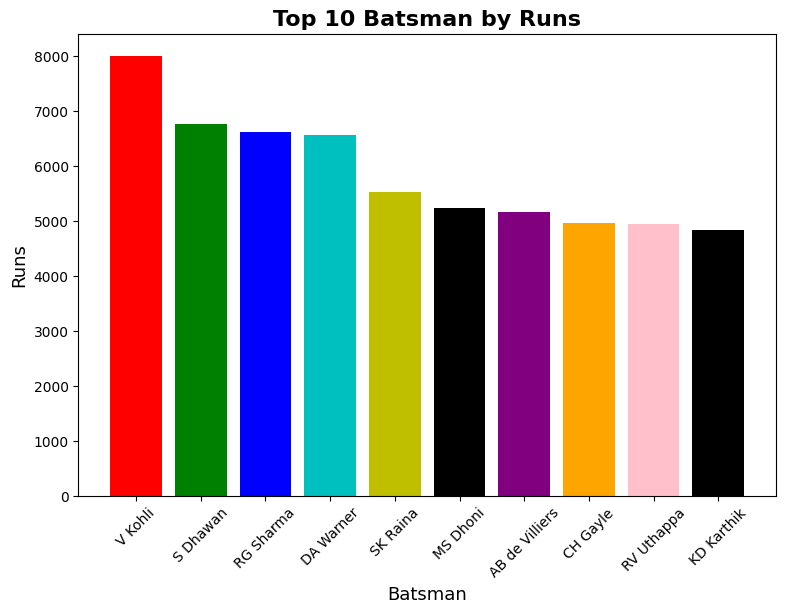

In [25]:
plt.figure(figsize=(9,6))

plt.bar(x=top_batter['batter'],
        height=top_batter['batsman_runs'],
        color=['r','g','b','c','y','k','purple','orange','pink','k']
        )

plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Batsman',fontsize=13)
plt.ylabel('Runs',fontsize=13)
plt.title('Top 10 Batsman by Runs',fontsize=16,fontweight='bold',color='k')

plt.show()

<ipython-input-26-70cf193cbbec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dismissal_kind',y='bowler',data=top_bowler,orient='h',palette='magma')


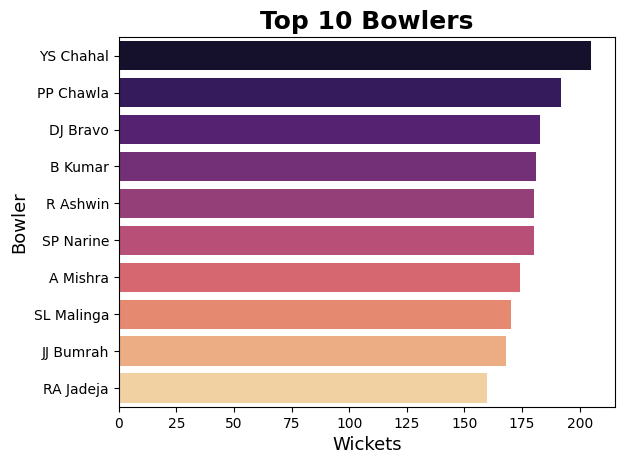

In [26]:
 valid_dismissal=["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]


 top_bowler=(df_del.loc[df_del['dismissal_kind'].isin(valid_dismissal)].groupby('bowler',as_index=False)['dismissal_kind']
            .count()
            .nlargest(10,'dismissal_kind')
            )
 top_bowler


 sns.barplot(x='dismissal_kind',y='bowler',data=top_bowler,orient='h',palette='magma')


plt.xlabel('Wickets',fontsize=13,color='k')
plt.ylabel('Bowler',fontsize=13,color='k')
plt.title('Top 10 Bowlers',fontsize=18,fontweight='bold',color='k')

 plt.show()

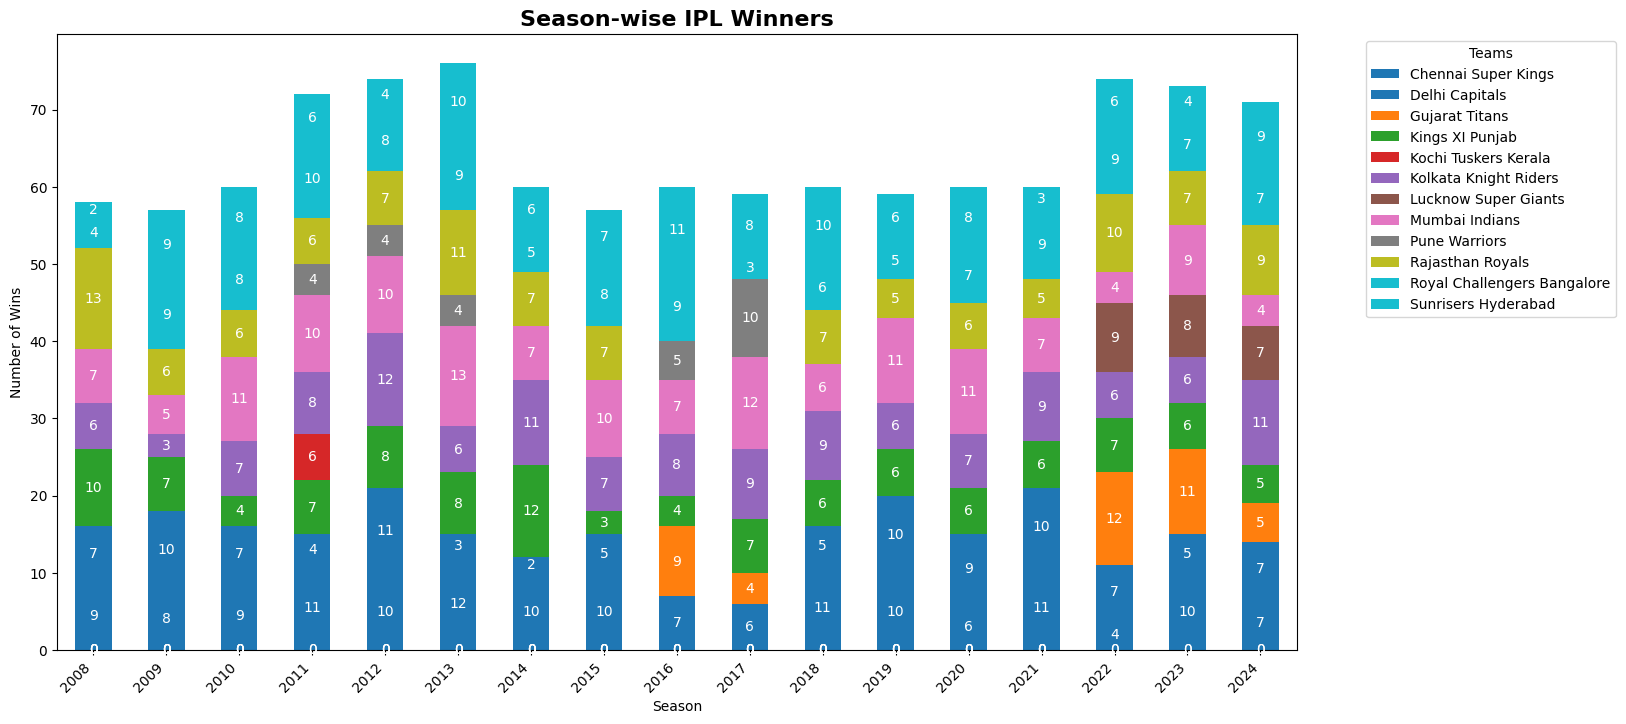

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))

df_mat.groupby(["season", "winner"]).size().unstack(fill_value=0).plot(
    kind="bar", stacked=True, colormap="tab10", ax=ax
)

for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", label_type="center", fontsize=10, color="white")

plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.title("Season-wise IPL Winners", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [28]:
most_sixes=(df_del[df_del['batsman_runs']==6].batter.value_counts().reset_index().
            head(10))
most_sixes

,batter,count
0,CH Gayle,359
1,RG Sharma,281
2,V Kohli,273
3,AB de Villiers,253
4,MS Dhoni,252
5,DA Warner,236
6,KA Pollard,224
7,AD Russell,209
8,SV Samson,206
9,SK Raina,204


<ipython-input-29-d897c5e99f88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='batter',data=most_sixes,orient='h',palette='viridis')


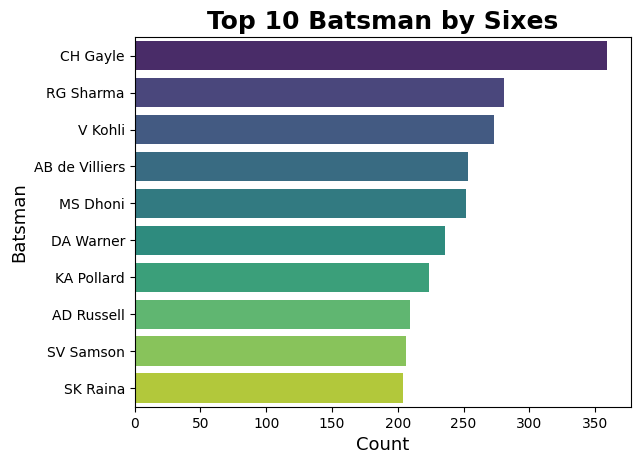

In [29]:
sns.barplot(x='count',y='batter',data=most_sixes,orient='h',palette='viridis')

plt.xlabel('Count',fontsize=13,color='k')
plt.ylabel('Batsman',fontsize=13,color='k')
plt.title('Top 10 Batsman by Sixes',fontsize=18,fontweight='bold',color='k')

plt.show()

In [30]:
most_four=(df_del[df_del['batsman_runs']==4].batter.value_counts().reset_index().
            head(10))
most_four

,batter,count
0,S Dhawan,768
1,V Kohli,708
2,DA Warner,663
3,RG Sharma,599
4,SK Raina,506
5,G Gambhir,492
6,RV Uthappa,481
7,AM Rahane,479
8,KD Karthik,466
9,F du Plessis,422


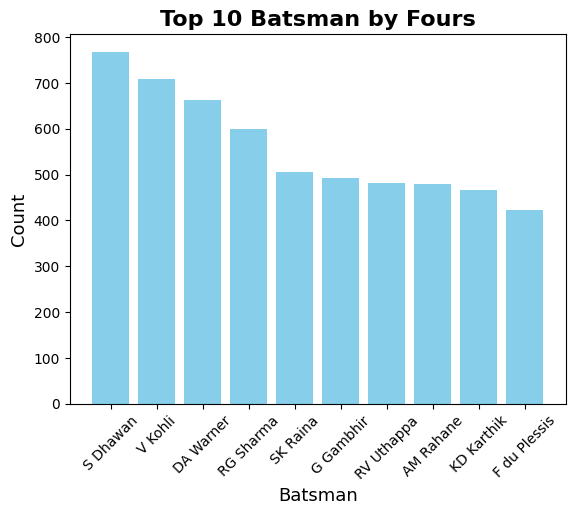

In [31]:
plt.bar(x=most_four['batter'],height=most_four['count'],color='skyblue')

plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Batsman',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Top 10 Batsman by Fours',fontsize=16,fontweight='bold',color='k')

plt.show()

In [32]:
top_fielders=(df_del[df_del['dismissal_kind']=='caught'].
              fielder.value_counts().
              reset_index().
              head(10))
top_fielders

,fielder,count
0,MS Dhoni,152
1,KD Karthik,145
2,AB de Villiers,120
3,V Kohli,114
4,SK Raina,106
5,RG Sharma,100
6,S Dhawan,100
7,RA Jadeja,97
8,KA Pollard,97
9,WP Saha,93


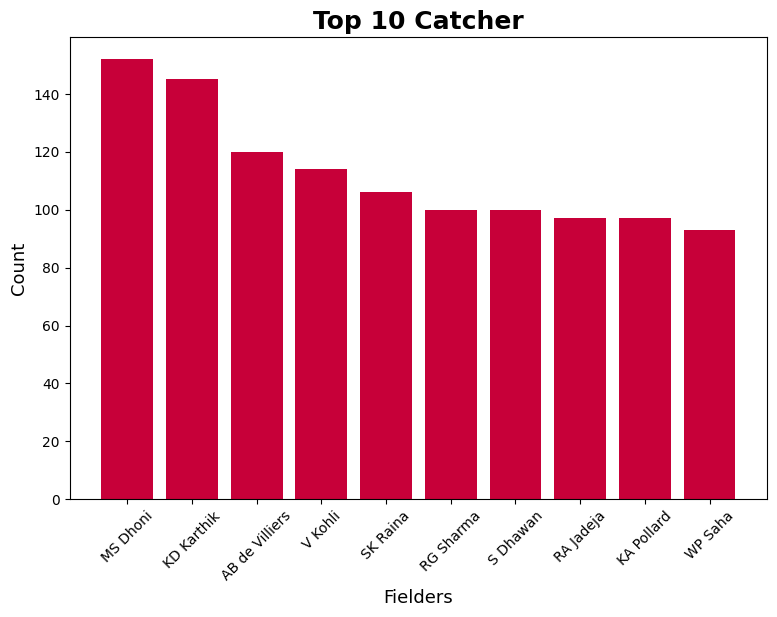

In [33]:
plt.figure(figsize=(9,6))

plt.bar(x=top_fielders['fielder'],height=top_fielders['count'],color='#C70039')

plt.xlabel('Fielders',fontsize=13,color='k')
plt.ylabel('Count',fontsize=13,color='k')
plt.title('Top 10 Catcher',fontsize=18,fontweight='bold',color='k')

plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [34]:
top_pom=df_mat['player_of_match'].value_counts().head(5)

top_pom


,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
V Kohli,18
DA Warner,18


<ipython-input-35-03457c74387e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pom.values, y=top_pom.index, palette="magma")


Text(0.5, 1.0, 'Top 5 Player of the Match Winners')

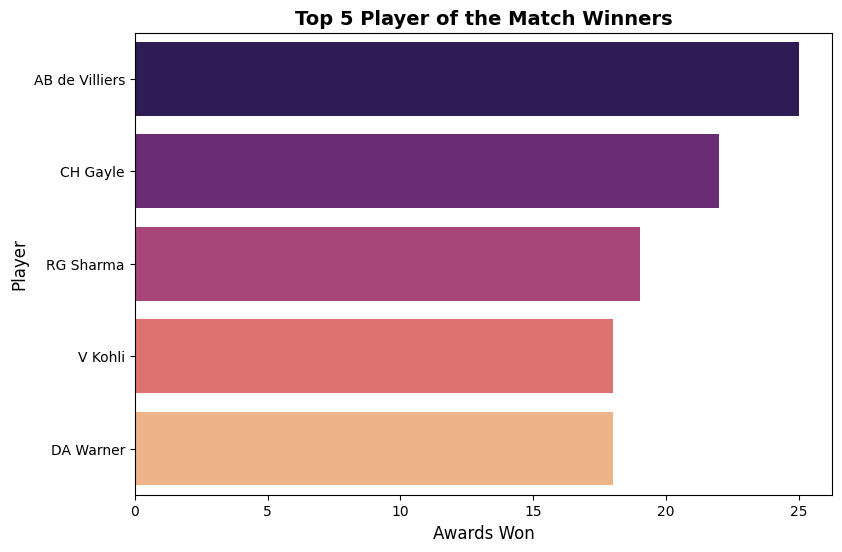

In [35]:

plt.figure(figsize=(9,6))
sns.barplot(x=top_pom.values, y=top_pom.index, palette="magma")

plt.xlabel("Awards Won", fontsize=12)
plt.ylabel("Player", fontsize=12)
plt.title("Top 5 Player of the Match Winners", fontsize=14, fontweight="bold")

In [36]:
team_200plus=(df_mat[df_mat['target_runs']>=200]['team1'].
              value_counts().
              reset_index().
              head(10))
team_200plus

,team1,count
0,Chennai Super Kings,26
1,Royal Challengers Bangalore,24
2,Delhi Capitals,17
3,Sunrisers Hyderabad,16
4,Kolkata Knight Riders,15
5,Rajasthan Royals,14
6,Kings XI Punjab,13
7,Mumbai Indians,13
8,Gujarat Titans,8
9,Lucknow Super Giants,5


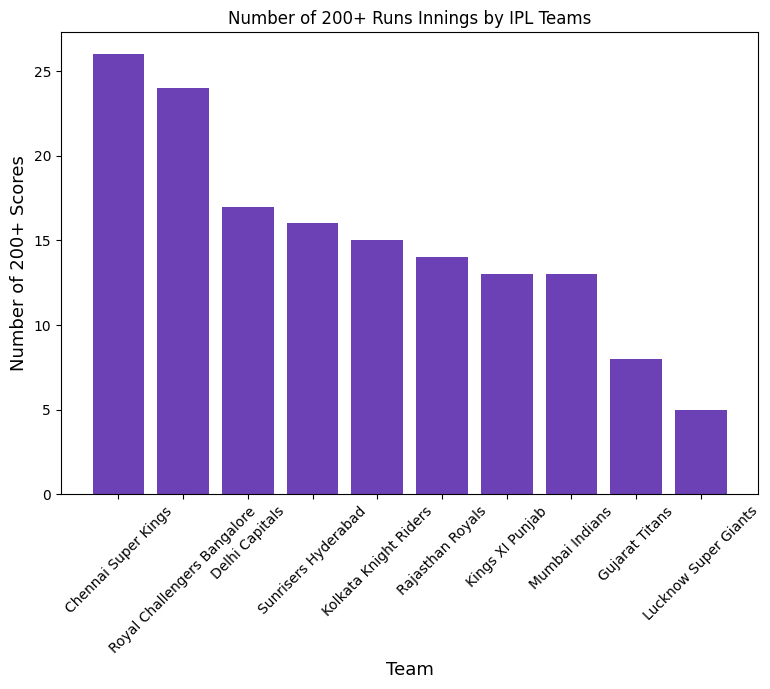

In [37]:
plt.figure(figsize=(9, 6))

plt.bar(x=team_200plus['team1'],height=team_200plus['count'],color='#6c41b5')

plt.xlabel('Team',fontsize=13,color='k')
plt.ylabel('Number of 200+ Scores',fontsize=13,color='k')
plt.title("Number of 200+ Runs Innings by IPL Teams")

plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [38]:
player_name = "MS Dhoni "
player_df = df_del.query("batter == 'MS Dhoni'")

player_stats = {
    "Runs": player_df["batsman_runs"].sum(),
    "Balls Faced": player_df["batsman_runs"].count(),
    "Fours": (player_df["batsman_runs"] == 4).sum(),
    "Sixes": (player_df["batsman_runs"] == 6).sum(),
    "Strike Rate": round((player_df["batsman_runs"].sum() / player_df["batsman_runs"].count()) * 100, 2)
}

print(player_stats)

{'Runs': np.int64(5243), 'Balls Faced': np.int64(3947), 'Fours': np.int64(363), 'Sixes': np.int64(252), 'Strike Rate': np.float64(132.84)}


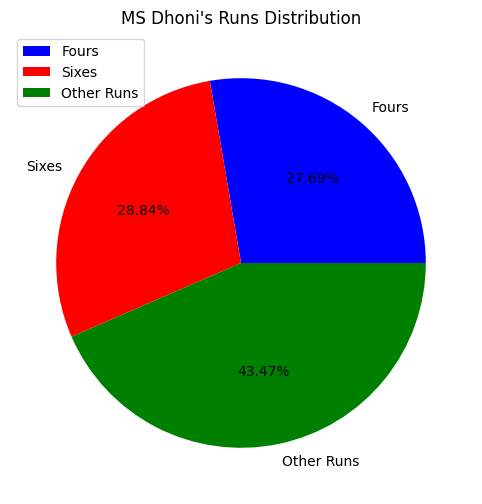

In [39]:
plt.figure(figsize=(9,6))

labels = ["Fours", "Sixes", "Other Runs"]
sizes = [player_stats["Fours"] * 4, player_stats["Sixes"] * 6, player_stats["Runs"] - (player_stats["Fours"] * 4 + player_stats["Sixes"] * 6)]
colors = ["blue", "red", "green"]
explode = (0, 0, 0)

plt.pie(sizes,labels=labels,autopct="%0.2f%%",colors=colors,explode=explode,shadow=False)
plt.title("MS Dhoni's Runs Distribution")
plt.legend()

plt.show()

In [40]:
df_del['bowler'].value_counts()

,count
bowler,
R Ashwin,4679
SP Narine,4146
B Kumar,4060
RA Jadeja,3895
PP Chawla,3895
...,...
SN Khan,2
SPD Smith,2
AC Gilchrist,1


In [41]:
bowler_name = "MK Tiwary "
bowler_df = df_del.query("bowler == 'MK Tiwary'")

bowler_stats = {
    "Runs": bowler_df["total_runs"].sum(),
    "Balls Bowled": len(bowler_df),
    "Wickets": bowler_df["player_dismissed"].count(),
    "Economy": round((bowler_df["total_runs"].sum() / len(bowler_df)) * 6, 2) if len(bowler_df) > 0 else 0
}

print(bowler_stats)

{'Runs': np.int64(83), 'Balls Bowled': 45, 'Wickets': np.int64(1), 'Economy': np.float64(11.07)}


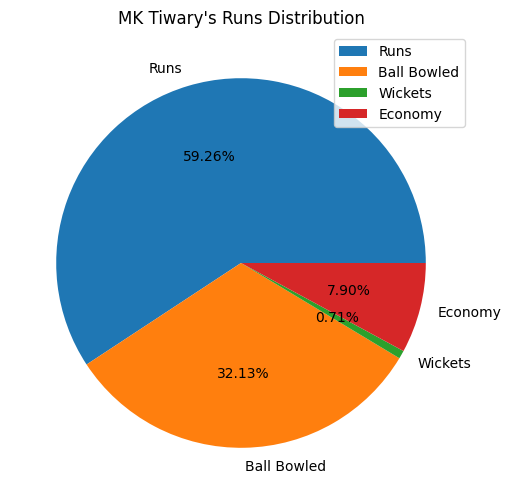

In [42]:
plt.figure(figsize=(9,6))

labels = ["Runs", "Ball Bowled", "Wickets","Economy"]
sizes = [bowler_stats["Runs"], bowler_stats["Balls Bowled"], bowler_stats["Wickets"],bowler_stats["Economy"]]
colors = ["blue", "red", "green","yellow"]
explode = (0, 0, 0,0)

plt.pie(sizes,labels=labels,autopct="%0.2f%%",explode=explode,shadow=False)
plt.title("MK Tiwary's Runs Distribution")
plt.legend()

plt.show()

In [43]:
#teams with most wins
df1 = df_mat["winner"].value_counts().reset_index()
df1.columns = ["Winner", "Wins"]
df1

,Winner,Wins
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,123
4,Sunrisers Hyderabad,117
5,Delhi Capitals,115
6,Kings XI Punjab,112
7,Rajasthan Royals,112
8,Gujarat Titans,41
9,Pune Warriors,27


<ipython-input-44-388a9b431176>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['Wins'], y=df1['Winner'], palette="magma")


Text(0.5, 1.0, 'Most match wins')

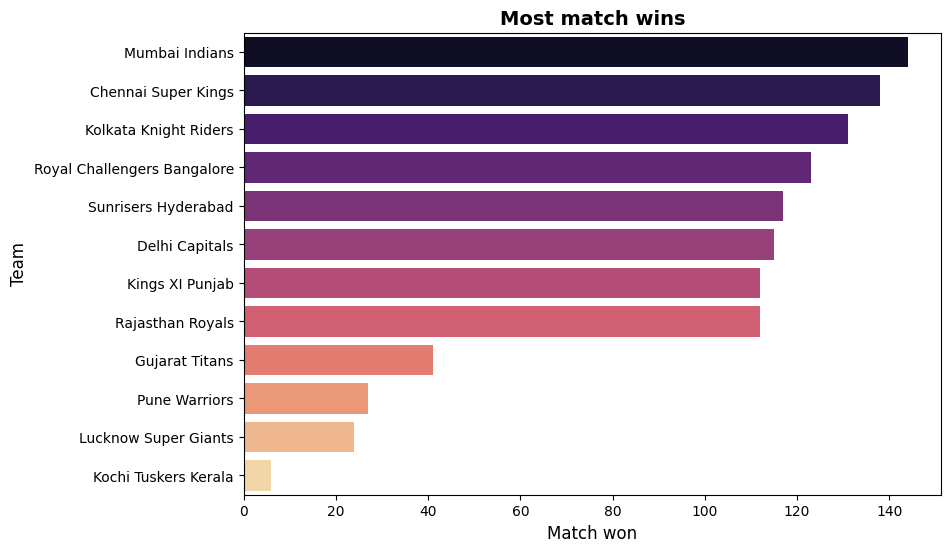

In [44]:
plt.figure(figsize=(9,6))
sns.barplot(x=df1['Wins'], y=df1['Winner'], palette="magma")

plt.xlabel("Match won", fontsize=12)
plt.ylabel("Team", fontsize=12)
plt.title("Most match wins", fontsize=14, fontweight="bold")

In [45]:
highest_total = df_mat.groupby(["team1"])["target_runs"].max().reset_index()
highest_total = highest_total.sort_values(by="target_runs", ascending=False).head(15)


print(highest_total)

                          team1  target_runs
11          Sunrisers Hyderabad        288.0
5         Kolkata Knight Riders        273.0
10  Royal Challengers Bangalore        264.0
1                Delhi Capitals        258.0
6          Lucknow Super Giants        258.0
0           Chennai Super Kings        247.0
3               Kings XI Punjab        241.0
7                Mumbai Indians        236.0
2                Gujarat Titans        234.0
9              Rajasthan Royals        223.0
8                 Pune Warriors        206.0
4          Kochi Tuskers Kerala        179.0


In [46]:
#df2 = df_del[(df_del["inning"].isin([1, 2])) & (df_del["batter"] == "V Kohli")]

#df2 = df_merged.groupby(["season",'batter'])["batsman_runs"].sum().reset_index()
#df2 = df2.sort_values(by="batsman_runs", ascending=False).head(20)

#print(df2)

In [60]:
df = df_del.merge(df_mat[['id', 'season']], left_on='match_id', right_on='id', how='left')

batsman_name = "V Kohli"
df_batsman = df[df["batter"] == batsman_name]


batsman_performance = df_batsman.groupby("season")["batsman_runs"].sum().reset_index()

batsman_performance = batsman_performance.sort_values(by="season", ascending=True)

batsman_performance



,season,batsman_runs
0,2008,165
1,2009,246
2,2010,307
3,2011,557
4,2012,364
5,2013,639
6,2014,359
7,2015,505
8,2016,973
9,2017,308


Text(0.5, 1.0, "Virat's perfomance over season")

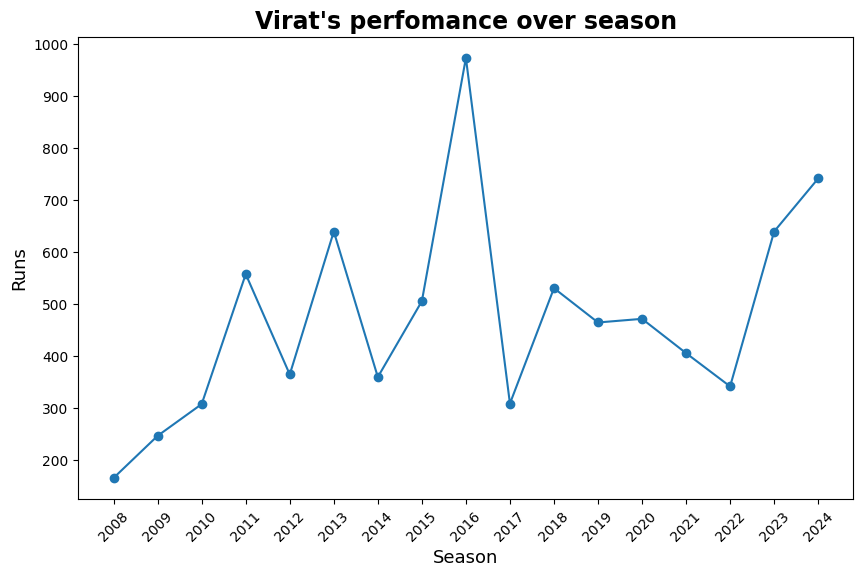

In [61]:
plt.figure(figsize=(10, 6))

plt.plot(batsman_performance['season'],batsman_performance['batsman_runs'],marker='o')

plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=13)
plt.ylabel('Runs',fontsize=13)

plt.title("Virat's perfomance over season",fontweight='bold',fontsize=17)